Globox is online e-commerce business. 
Globox is known among customers for boutique fashion item and high end decor product. but their food and beverage offering have grown tremendously in last few months. so the company want to awareness to this product category to increase revenue.

The Growth team decides to run an A/B test that highlights key products in the food and drink category as a banner at the top of the website. a) The control group does not see the banner, and b) the test group sees

group A : control group B: test or experiment

Set up of A/B test: -it is being run on mobile website. -user is randomly assigned to control or test group

if users do make purchase of the product on the same day or later is considered as "conversion"

After online review I found that General E-commerce conversion rate on an average is 12.9 % thoughout the year (resource: unbounce's converion benchmark report compared to B2B and B2C landing page conversion rate across 16 industry)
Based on that I would consider 13 % conversion rate as my Base line conversion rate. Team would be happy with the increase of 2 %, meaning that displaying banner at top of webiste is consider succsess if it raises the conversion rate to 15 %.
Before Rolling out the change, team would be more confortable testing it on small size of customers to see how it performs and for that they decided to perform A/B test on subset of your user

# Designing of A/B Experiment 

# formulating the hypothesis:
We don't know that Displaying Banner at top of website will lead to conversion or not. so we will choose the two tail test.
we are doing two different significant test for selected variable. here so we define two hypothesis for each test variable. 

General Hypothesis is:
H0 = There is no difference between control and experimental group
H1 = There is difference between control and experiment group

confidence level = 95 %

significant level alpha = 0.05 
(alpha value is the threshold that we set for this testing.) 
The probality of oberserved result(p-value) is lower than 0.05 then We reject Null hypothesis.

# Choosing Varibale
Control - There is No banner at top of website test - Banner at top of website

control and test group is our independent variable. (Note: there are many other varibles that can effect to our base conversion rate ex. Seasonality should take into account before calulating it)

our dependant variable(what is trying to measure ) is: 
A) Average purchase amount (t-statistical test)
B) Conversion rate. (binary variable) (Normal Distributuion (z) test) 

for conversion rate:
0 - user did not buy any product during this experiment 
1 - user bought the product during this experiment

# choosing the sample size
it is important to note that we wont test the whole user base (our population) Number of user or people we decide to capture in each group will have effect on precision of our estimated conversion rate. The more sample, more precise the estimated conversion rate.(smaller the confidence interval) so higher chance to detect difference if present.

Sample size is estimated through power analysis. 
Power of test is 1-B 
alpha = 0.05 
effect size = how big of a difference we expect

Base line conversion rate = 13 % 
Expected conversion rate = 15 % 
Diff = 2 % (mde- minimal detecttable effect)


In [2]:
# importing some useful packages for testing
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as sms
import seaborn as sns
from math import ceil
from sympy import symbols, Eq

In [3]:
%matplotlib inline
#some plot stying preferences
plt.style.use('seaborn-whitegrid')

# calculating effect size based on our expecte rate of conversion
effect_size = sms.proportion_effectsize(0.13,0.15)

# calculating required number of sample
n_required = sms.NormalIndPower().solve_power(effect_size, power = 0.8, alpha = 0.05, ratio= 1)

# rounding to the next role number
n_required = ceil(n_required)

print(f'The required sample size is {n_required} atleast for each variation or/ group')

The required sample size is 4720 atleast for each variation or/ group


# Collecting and preparation of dataset

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,userid,test_group,spent
0,1014313,B,NaN
1,1029532,B,NaN
2,1018168,A,NaN
3,1029599,A,NaN
4,1025920,B,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48943 entries, 0 to 48942
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userid      48943 non-null  int64  
 1   test_group  48943 non-null  object 
 2   spent       2094 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [7]:
df = df.fillna(value = 0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48943 entries, 0 to 48942
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userid      48943 non-null  int64  
 1   test_group  48943 non-null  object 
 2   spent       48943 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [9]:
df.columns

Index(['userid', 'test_group', 'spent'], dtype='object')

In [10]:
df['converted'] = np.where(df['spent'] > 0, 1,0)

In [11]:
df.head()

,userid,test_group,spent,converted
0,1014313,B,0.0,0
1,1029532,B,0.0,0
2,1018168,A,0.0,0
3,1029599,A,0.0,0
4,1025920,B,0.0,0


In [12]:
# based on Sample size calculation, we do sampling as per size calculation for each group
# in this case, we consider all given data is our sample
ab_test = df
ab_test.groupby('test_group').count()

,userid,spent,converted
test_group,,,
A,24343,24343,24343
B,24600,24600,24600


# Checking inference condition for sample
Random condition:
A/B test is carried out on randomly selected users and they were assigned control and experiment group randomly.

Normal condition:
Sample size > 30 so we can say it is normally distributed.

Independent condition:
Sampling is done with replacement so we can say, it is independent sample.



A) Checking difference in average amount spent per user between control and experiment group(t-test)
our sample met all inferece condition, so we will do t-statistical test to check significance diifference in avearge amount spent betweeen two groups.
confidence level is 95%
significal level(assumed) alpha = 0.05

We assume:
Null hypothesis : H0 = There is no significant difference between mean of purchase amount between control and experiment group
                        u0 - u1 =0
Alternative Hypothesis: H1 = There is difference between mean of purchase amount between control and experiment group
                           u0 is not equal to u1

In [13]:
# Visulization of Results for two group:
average_spent = ab_test.groupby('test_group')['spent']

std_s = lambda x: np.std(x, ddof=1)
se_s = lambda x: stats.sem(x, ddof=1)

average_spent = average_spent.agg([np.mean, std_s, se_s])
average_spent.columns = ["average_spent","standard_deviation","standard_error"]
average_spent

,average_spent,standard_deviation,standard_error
test_group,,,
A,3.374518,25.936391,0.166235
B,3.390867,25.414110,0.162034


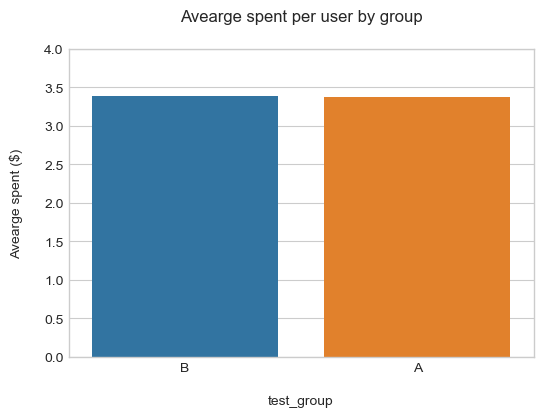

In [28]:
# plotting makes easy to grasp result
plt.figure(figsize=(6,4))

sns.barplot(x=ab_test['test_group'], y=ab_test['spent'], ci=False)

plt.ylim(0,4.0)
plt.title('Avearge spent per user by group', pad=20)
plt.xlabel('test_group', labelpad=15)
plt.ylabel("Avearge spent ($)", labelpad=15)
plt.yticks()
plt.savefig("average_spent_per_user_by_group.jpg")
plt.show()

In [15]:
# performing Hypothesis test and doing statistical calculation
# Calculating t-statistics for difference in avearge amount spent in user:
control = ab_test.loc[ab_test["test_group"] == "A","spent"].to_numpy()
exp = ab_test.loc[ab_test["test_group"] == "B","spent"].to_numpy()

control_mean, exp_mean = np.mean(control),np.mean(exp)
n_control, n_exp = len(control),len(exp)
control_var, exp_var = np.var(control, ddof=1),np.var(exp, ddof=1)

# pooled variance for both group
pooled_var = (((n_control-1)*control_var)+((n_exp -1)*exp_var))/(n_control+n_exp-2)

# std error:
std_error = np.sqrt(pooled_var * (1/n_control + 1/n_exp))

# calculating t statistics

t = round(abs(exp_mean - control_mean)/std_error,3)
print("T-statistics for difference in avearge spent per user between two group is: "+ str(t))

T-statistics for difference in avearge spent per user between two group is: 0.07


In [30]:
#calculating critical t value for two tailed sample
t_critical = round(stats.t.ppf(q=0.975,df=48943),2)
t_critical
print("T-critical Value at 95 % is: " + str(t_critical))

T-critical Value at 95 % is: 1.96


In [31]:
# calculating p value for two tailed sample
p_value = r=round(2 * (1-stats.t.cdf(x=t,df=48943)),3)
p_value
print("p - value for difference in mean of average spent per user is: " + str(p_value))

p - value for difference in mean of average spent per user is: 0.944


In [18]:
# 95 % confidence interval for control group
conf_control = t_critical * np.std(control)/np.sqrt(n_control)
lower_limit = round(control_mean - conf_control,3)
upper_limit = round(control_mean + conf_control,3)
print("95 % confidence interval for control group is : " + str(lower_limit) + " to " + str(upper_limit))

95 % confidence interval for control group is : 3.049 to 3.7


In [19]:
# 95 % confidence interval for Experimental Group 
conf_exp = t_critical * np.std(exp)/np.sqrt(n_exp)
lo_limit = round(exp_mean - conf_exp, 3)
up_limit = round(exp_mean + conf_exp,3)
print("95 % confidence interval for experimental group is : " + str(lo_limit) + " to " + str(up_limit))

95 % confidence interval for experimental group is : 3.073 to 3.708


In [20]:
# 95 % confidence interval for difference in mean of average spent per user between two groups


# Evaluation of our test Results
Assumed Alpha Value is: 0.05
The probability (p-value) is 0.944 which is higher than the alpha value.
so that we fail to reject our Null Hypothesis that there is no difference in average amount spent per user between cotrol and experiment group.

B) for conversion_rate (z-test)

Null Hypothesis:
H0 = There is no difference in user conversion rate between control and experimental group
        p = p0
H1 = There is difference in user conversion rate between control and experimental group
    p =/ p0


In [21]:
# calculating converion rate for both groups
conversion_rates = ab_test.groupby('test_group')['converted']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.4f}')

,conversion_rate,std_deviation,std_error
test_group,,,
A,0.0392,0.1941,0.0012
B,0.0463,0.2101,0.0013


In [22]:
conv_rate_control_pct = round(conversion_rates["conversion_rate"][0] * 100, 2)
conv_rate_exp_pct = round(conversion_rates["conversion_rate"][1] * 100, 2)
print("conversion rate for control group is: " + str(conv_rate_control_pct) + " %")
print("conversion rate for experimental group is: " + str(conv_rate_exp_pct) + " %")

conversion rate for control group is: 3.92 %
conversion rate for experimental group is: 4.63 %


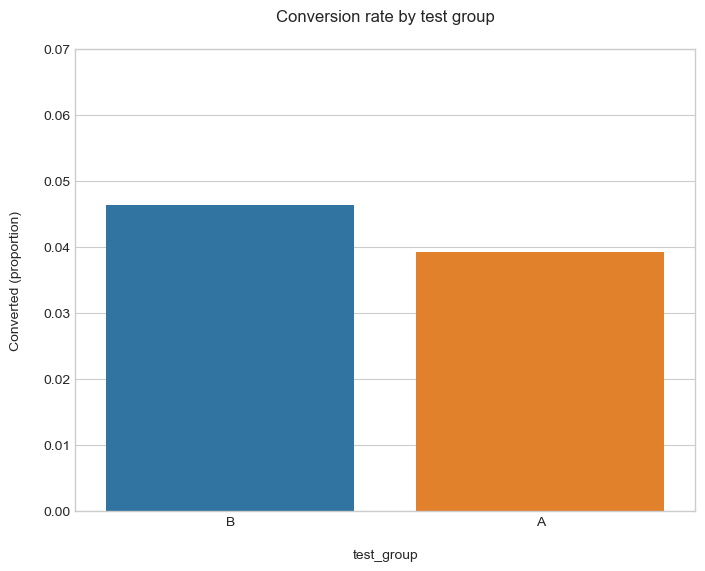

In [29]:
# plotting data in figure
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['test_group'], y=ab_test['converted'], ci=False)

plt.ylim(0, 0.07)
plt.title('Conversion rate by test group', pad=20)
plt.xlabel('test_group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15)
plt.savefig("conversion_rate_by_group.jpg")
plt.show()

In [24]:
# Calculating Z statistics for hypothesis testing (Normal distribution)
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control_result = ab_test[ab_test['test_group'] == 'A']['converted']
exp_result = ab_test[ab_test['test_group'] == 'B']['converted']
n_con = control_result.count()
n_exp = exp_result.count()
successes = [control_result.sum(), exp_result.sum()]
nobs = [n_con, n_exp]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_exp), (upper_con, upper_exp) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.4f}')
print(f'ci 95% for control group: [{lower_con:.4f}, {upper_con:.4f}]')
print(f'ci 95% for experiment group: [{lower_exp:.4f}, {upper_exp:.4f}]')

z statistic: -3.86
p-value: 0.0001
ci 95% for control group: [0.0368, 0.0417]
ci 95% for experiment group: [0.0437, 0.0489]


In [25]:
#calculating critical z value:
z_critical = round(stats.norm.ppf(0.975),2)
print("Critical Z value is: " + str(z_critical))

Critical Z value is: 1.96


In [26]:
# 95 % confidence interval of mean of difference of conversion rate between two group
